In [2]:
import os
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the data directory
data_dir = os.path.abspath('/Users/azeemshaik/Downloads/fds/data')
print(f'The data directory is: {data_dir}')


The data directory is: /Users/azeemshaik/Downloads/fds/data


In [6]:
# Load the data files
file_paths = [
    os.path.join(data_dir, f) for f in os.listdir(data_dir)
    if os.path.splitext(f)[1].lower() == '.xpt'
]
data_files = [pd.read_sas(f) for f in tqdm(file_paths, desc='Loading Data')]

Loading Data:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
# Merge all the data files into a single DataFrame 
data = data_files[0]
for df in tqdm(data_files[1:], desc='Merging Data'):
    data = pd.merge(data, df, how='outer', on='SEQN', validate='1:1')

print('The data frame has {} rows and {} columns'.format(*data.shape))
if data['SEQN'].duplicated().sum() > 0:
    print('WARNING: The data has duplicated identifiers. Something is wrong.')


Merging Data:   0%|          | 0/3 [00:00<?, ?it/s]

The data frame has 11933 rows and 62 columns


In [10]:
# Problem 1.1: Function to generate sample means
def hdl_means(n):
    return np.mean(np.random.choice(hdl_cholesterol, (10000, n)), axis=1)


In [12]:

# Extract HDL cholesterol values
hdl_cholesterol = data['LBDHDD'].dropna().to_numpy()


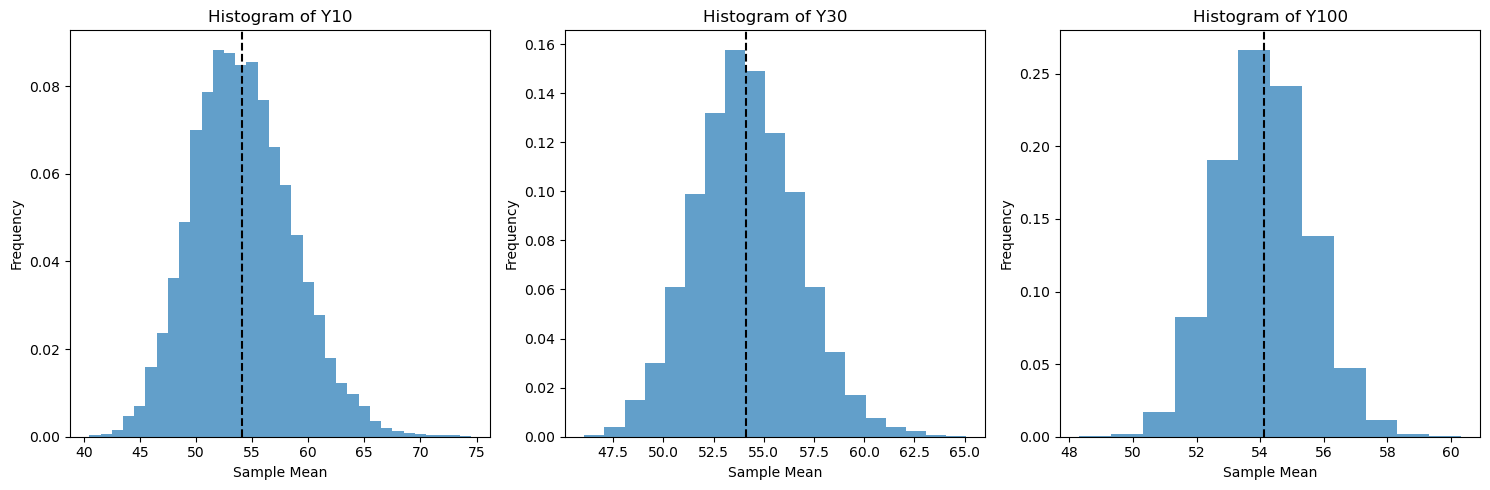

In [15]:
# Problem 1.2: Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
n_values = [10, 30, 100]
for ax, n in zip(axes, n_values):
    sample_means = hdl_means(n)
    ax.hist(sample_means, bins=np.arange(min(sample_means), max(sample_means) + 1, 1), density=True, alpha=0.7)
    ax.axvline(np.mean(sample_means), color='black', linestyle='dashed')
    ax.set_title(f'Histogram of Y{n}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [17]:
# Problem 1.4: Compute theoretical values
mean_x = np.mean(hdl_cholesterol)
std_x = np.std(hdl_cholesterol, ddof=1)
for n in n_values:
    mean_y = mean_x
    std_y = std_x / np.sqrt(n)
    sample_means = hdl_means(n)
    empirical_mean = np.mean(sample_means)
    empirical_std = np.std(sample_means, ddof=1)
    print(f'For Y{n}:')
    print(f'Absolute difference in mean: {abs(mean_y - empirical_mean):.2e}')
    print(f'Absolute difference in std: {abs(std_y - empirical_std):.2e}')


For Y10:
Absolute difference in mean: 8.79e-03
Absolute difference in std: 6.26e-02
For Y30:
Absolute difference in mean: 2.82e-02
Absolute difference in std: 7.05e-03
For Y100:
Absolute difference in mean: 1.29e-02
Absolute difference in std: 5.21e-03


In [19]:
# Problem 2: Analyze height differences
prompt2_subset = data[['RIAGENDR', 'RIDAGEYR', 'BMXHT']].dropna()
prompt2_subset = prompt2_subset.loc[prompt2_subset['RIDAGEYR'] >= 18]

male = (prompt2_subset['RIAGENDR'] == 1).to_numpy()
female = (prompt2_subset['RIAGENDR'] == 2).to_numpy()
height = prompt2_subset['BMXHT'].to_numpy()


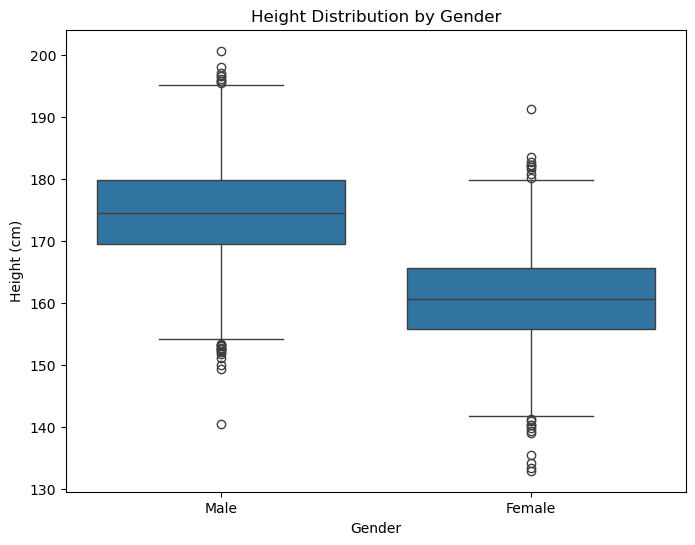

In [21]:
# Problem 2.1: Boxplot comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x=['Male'] * sum(male) + ['Female'] * sum(female), y=np.concatenate([height[male], height[female]]))
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.title('Height Distribution by Gender')
plt.show()

In [23]:
# Problem 2.2: Welch's t-test
t_stat, p_value = stats.ttest_ind(height[male], height[female], equal_var=False)
print(f'T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}')


T-statistic: 72.4524, P-value: 0.0000e+00


In [25]:
# Problem 3: Correlation between age and blood pressure
prompt3_subset = data[['BPXOSY1', 'BPXODI1', 'RIDAGEYR']].dropna()
systolic = prompt3_subset['BPXOSY1'].to_numpy()
diastolic = prompt3_subset['BPXODI1'].to_numpy()
age = prompt3_subset['RIDAGEYR'].to_numpy()

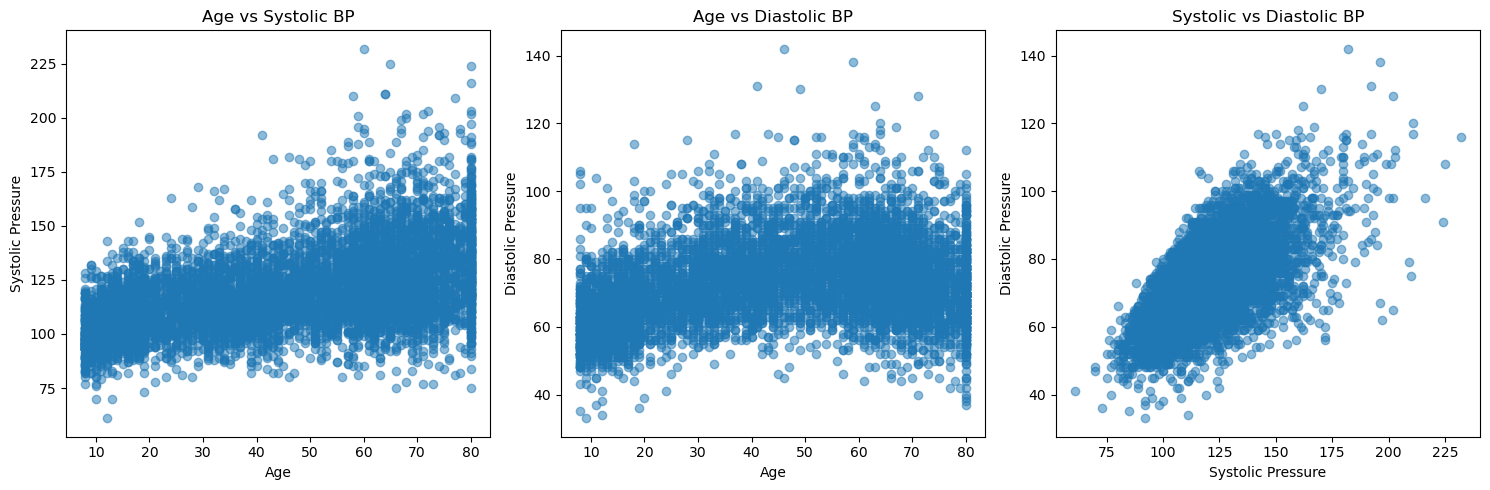

In [27]:
# Problem 3.1: Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(age, systolic, alpha=0.5)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Systolic Pressure')
axes[0].set_title('Age vs Systolic BP')

axes[1].scatter(age, diastolic, alpha=0.5)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Diastolic Pressure')
axes[1].set_title('Age vs Diastolic BP')

axes[2].scatter(systolic, diastolic, alpha=0.5)
axes[2].set_xlabel('Systolic Pressure')
axes[2].set_ylabel('Diastolic Pressure')
axes[2].set_title('Systolic vs Diastolic BP')

plt.tight_layout()
plt.show()


In [29]:
# Problem 3.2: Compute Pearson correlations
corr_age_systolic, _ = stats.pearsonr(age, systolic)
corr_age_diastolic, _ = stats.pearsonr(age, diastolic)
corr_systolic_diastolic, _ = stats.pearsonr(systolic, diastolic)
print(f'Correlation (Age, Systolic): {corr_age_systolic:.4f}')
print(f'Correlation (Age, Diastolic): {corr_age_diastolic:.4f}')
print(f'Correlation (Systolic, Diastolic): {corr_systolic_diastolic:.4f}')


Correlation (Age, Systolic): 0.5148
Correlation (Age, Diastolic): 0.3083
Correlation (Systolic, Diastolic): 0.6585
